In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_merg_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")

# Display the data table for preview
mouse_clinical_merg_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_group = mouse_clinical_merg_df.groupby(["Drug", "Timepoint"])
mean_tum_vol = drug_time_group["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tum_vol_df = pd.DataFrame({"Mean Tumor Volume":mean_tum_vol})

# Preview DataFrame
mean_tum_vol_df.head()

Mean Tumor Volume
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tum_vol = drug_time_group["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_tum_vol_df = pd.DataFrame({"Sem of Tumor Volumes":sem_tum_vol})

# Preview DataFrame
sem_tum_vol_df.head()


Sem of Tumor Volumes
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.448593
          10                     0.702684
          15                     0.838617
          20                     0.909731

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_unpack_df = mean_tum_vol_df.unstack(level=0)
sem_unpack_df = sem_tum_vol_df.unstack(level=0)

# Preview that Reformatting worked
mean_unpack_df.head()

Mean Tumor Volume                                              \
Drug              Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                 
0                 45.000000  45.000000  45.000000  45.000000  45.000000   
5                 44.266086  46.503051  47.062001  47.389175  46.796098   
10                43.084291  48.285125  49.403909  49.582269  48.694210   
15                42.064317  50.094055  51.296397  52.399974  50.933018   
20                40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [5]:
sem_unpack_df.head()

Sem of Tumor Volumes                                          \
Drug                 Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                
0                     0.000000  0.000000  0.000000  0.000000  0.000000   
5                     0.448593  0.164505  0.235102  0.264819  0.202385   
10                    0.702684  0.236144  0.282346  0.357421  0.319415   
15                    0.838617  0.332053  0.357705  0.580268  0.444378   
20                    0.909731  0.359482  0.476210  0.726484  0.595260   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


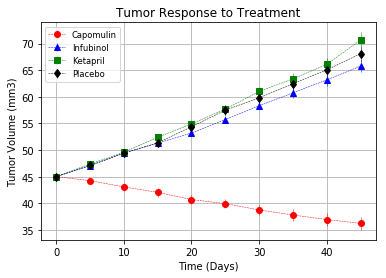

In [6]:
# Generate the Plot (with Error Bars)


#=========Tumor=Volume================

#Use index (time) for x axis
x_axis = mean_unpack_df.index
#Capomulin not in column if I try to get the data using brackets and dataframe.  ??????

#Get data for each drug
capomulin = mean_unpack_df.iloc[:,0]
infubinol = mean_unpack_df.iloc[:,2]
ketapril = mean_unpack_df.iloc[:,3]
placebo = mean_unpack_df.iloc[:,5]

#Get error bars from sem dataframe
cap_er = sem_unpack_df.iloc[:,0]
inf_er = sem_unpack_df.iloc[:,2]
ket_er = sem_unpack_df.iloc[:,3]
plac_er = sem_unpack_df.iloc[:,5]


#Create lines for chart with errorbars
#Tried to use subpot funtion and failed miserably....  Josh said he'd go over it.  Ask.
#fig, (cap, inf, key, plac) = plt.subplots()
plt.errorbar(x_axis, capomulin, yerr=cap_er, fmt="--o", color="r", label="Capomulin", linewidth=0.5)
plt.errorbar(x_axis, infubinol, yerr=inf_er, fmt="--^", color="b", label="Infubinol", linewidth=0.5)
plt.errorbar(x_axis, ketapril, yerr=ket_er, fmt="--s", color="g", label="Ketapril", linewidth=0.5)
plt.errorbar(x_axis, placebo, yerr=plac_er, fmt="--d", color="k", label="Placebo", linewidth=0.5)

#Polishing
plt.grid()
plt.legend(loc="best", fontsize="small")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Tumor_Response_to_Treatment_graph.png")
plt.show()


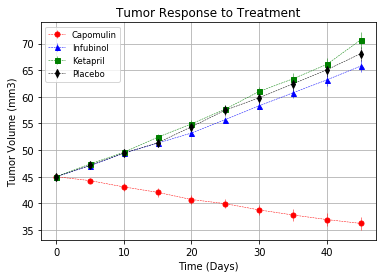

In [5]:
# Show the Figure


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = drug_time_group["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame({"Metastatic Sites":mean_met})

# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met = drug_time_group["Metastatic Sites"].sem()

# Convert to DataFrame
sem_met_df = pd.DataFrame(sem_met)

# Preview DataFrame
sem_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_unpack_df = mean_met_df.unstack(level=0)
sem_met_unpack_df = sem_met_df.unstack(level=0)


# Preview that Reformatting worked
mean_met_unpack_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


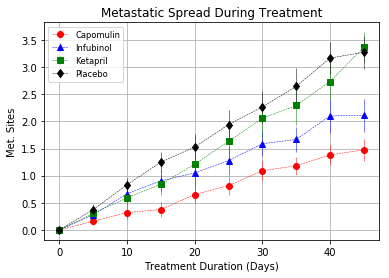

In [10]:
# Generate the Plot (with Error Bars)


#=====Metastatic=Sites=========
#Use index (time) for x axis
x_axis_met = mean_met_unpack_df.index


#get data for lines
capomulin_met = mean_met_unpack_df.iloc[:,0]
infubinol_met = mean_met_unpack_df.iloc[:,2]
ketapril_met = mean_met_unpack_df.iloc[:,3]
placebo_met = mean_met_unpack_df.iloc[:,5]


#use sem data for error bars
cap_met_er = sem_met_unpack_df.iloc[:,0]
inf_met_er = sem_met_unpack_df.iloc[:,2]
ket_met_er = sem_met_unpack_df.iloc[:,3]
plac_met_er = sem_met_unpack_df.iloc[:,5]

#create lines with error bars
plt.errorbar(x_axis_met, capomulin_met, yerr=cap_met_er, fmt="--o", color="r", label="Capomulin", linewidth=0.5)
plt.errorbar(x_axis_met, infubinol_met, yerr=inf_met_er, fmt="--^", color="b", label="Infubinol", linewidth=0.5)
plt.errorbar(x_axis_met, ketapril_met, yerr=ket_met_er, fmt="--s", color="g", label="Ketapril", linewidth=0.5)
plt.errorbar(x_axis_met, placebo_met, yerr=plac_met_er, fmt="--d", color="k", label="Placebo", linewidth=0.5)

#Polishing
plt.grid()
plt.legend(loc="best", fontsize="small")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")
plt.show()


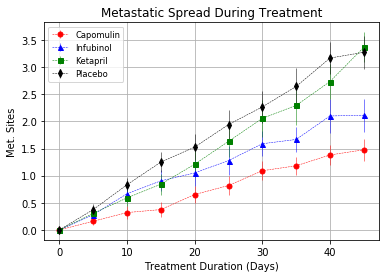

## Survival Rates

In [11]:
mouse_clinical_merg_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = drug_time_group["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_unpack = mouse_count_df.unstack(level=0)

# Preview the Data Frame
mouse_count_unpack.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


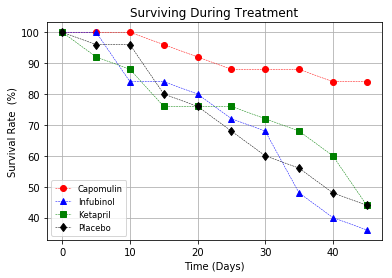

In [26]:
# Generate the Plot (Accounting for percentages)


#==================Mouse=Counts===================
#set X axis using index (time)
x_axis_mouse = mouse_count_unpack.index


#get data for lines.  Needs to be in percentage so have to divide desired value by first value (all mice alive)
capomulin_mouse = 100 * mouse_count_unpack.iloc[:,0] / mouse_count_unpack.iloc[0,0]
infubinol_mouse = 100 * mouse_count_unpack.iloc[:,2] / mouse_count_unpack.iloc[0,2]
ketapril_mouse = 100 * mouse_count_unpack.iloc[:,3] / mouse_count_unpack.iloc[0,3]
placebo_mouse = 100 *mouse_count_unpack.iloc[:,5] / mouse_count_unpack.iloc[0,5]

#plot
#there are no error bars here.  When I tried a regular plot I couldn't get the dotted line, without a ton of errors.
#if I don't include the errorbar value there are no error bars on the graph and it looks perfect.  This should be ok.
plt.errorbar(x_axis_mouse, capomulin_mouse, fmt="--o", color="r", label="Capomulin", linewidth=0.5)
plt.errorbar(x_axis_mouse, infubinol_mouse, fmt="--^", color="b", label="Infubinol", linewidth=0.5)
plt.errorbar(x_axis_mouse, ketapril_mouse, fmt="--s", color="g", label="Ketapril", linewidth=0.5)
plt.errorbar(x_axis_mouse, placebo_mouse, fmt="--d", color="k", label="Placebo", linewidth=0.5)


# plt.plot(x_axis_mouse, capomulin_mouse, marker="o", color="r", label="Capomulin", linewidth=0.5)
# plt.plot(x_axis_mouse, infubinol_mouse, marker="^", color="b", label="Infubinol", linewidth=0.5)
# plt.plot(x_axis_mouse, ketapril_mouse, marker="s", color="g", label="Ketapril", linewidth=0.5)
# plt.plot(x_axis_mouse, placebo_mouse, marker="d", color="k", label="Placebo", linewidth=0.5)


#Polishing
plt.grid()
plt.legend(loc="best", fontsize="small")
plt.title("Surviving During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate  (%)")

# Save the Figure
plt.savefig("Surviving_During_Treatment.png")
plt.show()


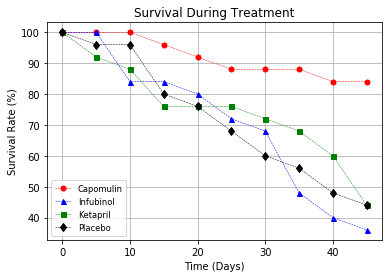

## Summary Bar Graph

In [15]:
mean_unpack_df.head()

Mean Tumor Volume                                              \
Drug              Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                 
0                 45.000000  45.000000  45.000000  45.000000  45.000000   
5                 44.266086  46.503051  47.062001  47.389175  46.796098   
10                43.084291  48.285125  49.403909  49.582269  48.694210   
15                42.064317  50.094055  51.296397  52.399974  50.933018   
20                40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

In [16]:
mean_unpack_df.columns
#WHAT IS GOING ON!?!?!?
#use columns for drug list.  Ask TA how to get drug column in multindex so I don't have to copy and paste.

MultiIndex(levels=[['Mean Tumor Volume'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])

In [17]:
# Calculate the percent changes for each drug

#empty list for new DF
pct_mouse = [] 
#for loop to get the percent change.  I attempted to make a new dataframe using .pct_change() of the first and last rows, but it was bulky and complicated.
#ask TAs if there is a quick and clean way of doing this
for i in range(len(mean_unpack_df.columns)):
    pct_mouse.append(((mean_unpack_df.iloc[-1,i] / mean_unpack_df.iloc[0,i] ) -1) * 100)

#copy and past index from above.  Can't figure out how to get this list by calling a multiindex.  Ask TA for help.
drug_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

#create data frame of PCT_Change and drugs
pct_mouse_df = pd.DataFrame({"Drug":drug_list, "PCT":pct_mouse})
# Display the data to confirm
pct_mouse_df

,Drug,PCT
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


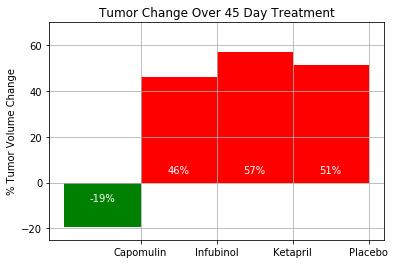

In [92]:
# Store all Relevant Percent Changes into a Tuple
bar_data_df = pct_mouse_df.loc[(pct_mouse_df["Drug"]=="Capomulin") | (pct_mouse_df["Drug"]=="Infubinol") | 
                               (pct_mouse_df["Drug"]=="Ketapril") | (pct_mouse_df["Drug"]=="Placebo"), :]

# Splice the data between passing and failing drugs
passing_pct_df = bar_data_df.loc[bar_data_df["PCT"]<0,:]
failing_pct_df = bar_data_df.loc[bar_data_df["PCT"]>0,:]

#create x location for passing data
pass_x_axis = np.arange(len(passing_pct_df))

#subplot setup
fig, ax = plt.subplots()

#create passing bar
pass_bar = ax.bar(pass_x_axis, passing_pct_df["PCT"], color="g", align="edge", width=1)

#creat failing locations.  Need to start after passing.
fail_x_axis = np.arange(len(passing_pct_df), (len(passing_pct_df) + len(failing_pct_df)))

#create bars for failing.
fail_bar = ax.bar(fail_x_axis, failing_pct_df["PCT"], color="r", align="edge", width=1) 

#set ticks.  Add passing and failing data.  Increase range by one to align the labels on the right of the bars.
tick_locations = np.arange(1, (len(passing_pct_df) + len(failing_pct_df) + 1))

#set tick labels by appending failing to passing so they're in order.
tick_labels = passing_pct_df["Drug"].append(failing_pct_df["Drug"])
plt.xticks(tick_locations, tick_labels)

#clean y ticks and limit
plt.yticks(np.arange(-20, 80, 20))
plt.ylim(-25, 70)                          
plt.grid()

# Use functions to label the percentages of changes
#I don't remember ever going over this in class.....  Not sure if this is what I'm suppposed to do.
def autolabel(Bars):
    for bar in Bars:
        height = bar.get_height()
        if height>=0:
            ax.text(bar.get_x() + bar.get_width()/2., 4,
                    str(int(height)) + "%", ha='center', color="white")
        else:
            ax.text(bar.get_x() + bar.get_width()/2., -8,
                    str(int(height)) + "%", ha='center', color="white")
            
#use function to label the bars.
autolabel(pass_bar)
autolabel(fail_bar)


#Add axis and chart label
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


# Save the Figure
plt.savefig("Most_Pain_in_the_Ass_Bar_Chart_Ever.png")

# Show the Figure
plt.show()

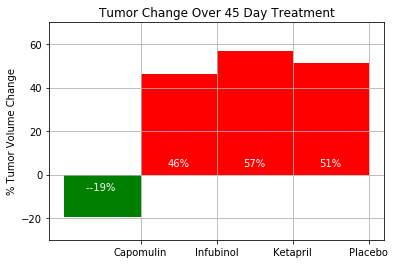

Observation 1:
The average tumor sizes for tumors in mice treated with the target drugs increased over time at the same rate as the placebo, except for mice treated with Capomulin in which case the average tumor size decreased slightly.

Observation 2:
The average number of metastatic sites in mice treated with Ketapril increased at the same rate as the placebo.  When compared to the placebo group, the mice treated with Capomulin and Infubinal had a lower increase in metastatic sites over the course of treatment.

Observation 3:
The overall survival rate for mice treated with Ketapril was similar to the placebo.  Although mice treated with Infubinol had a slightly decreased rate of metastatic spread, the survival rate for those same mice was lower than the placebo group indicating some level of toxicity of Infubinol.  Mice treated with Capomulin had the highest survival rate out of all groups.
